<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/10_Image_Matirx_transzformaciok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Mátrix traszformációk


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.rcParams['figure.figsize'] = (16, 4)

In [ ]:
X, Y = np.mgrid[0:1:5j, 0:1:5j]
x, y = X.ravel(), Y.ravel()

In [ ]:
X

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  ]])

In [ ]:
Y

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

## 1. Eltolás
---
$$
\large x'=x + t_x \\
\large y'=y + t_y
$$

$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

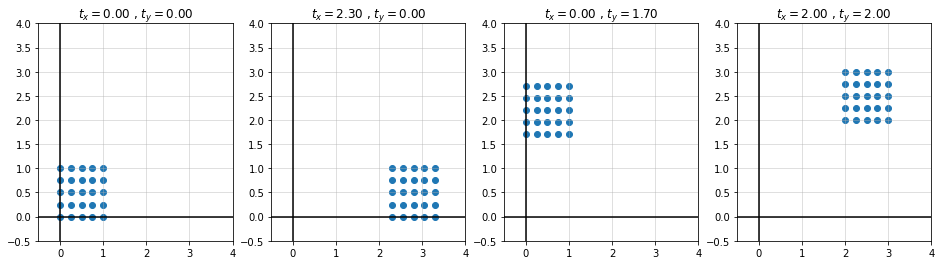

In [ ]:
def trans_translate(x, y, tx, ty):
    T = [[1, 0, tx],
         [0, 1, ty],
         [0, 0, 1 ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

T_ = [[0, 0], [2.3, 0], [0, 1.7], [2, 2]]

for i in range(4):
    tx, ty = T_[i]
    x_, y_, _ = trans_translate(x, y, tx, ty)
    ax[i].scatter(x_, y_)
    ax[i].set_title(r'$t_x={0:.2f}$ , $t_y={1:.2f}$'.format(tx, ty))
    
    ax[i].set_xlim([-0.5, 4])
    ax[i].set_ylim([-0.5, 4])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

## 2. Nyújtás
---
Az $(p_x, p_y)$ ponthoz képest
$$
\large x'=s_x(x - p_x) + p_x = s_x x + p_x(1 - s_x)\\
\large y'=s_y(y - p_y) + p_y = s_y y + p_y(1 - s_y)
$$
&nbsp;
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} s_x & 0 & p_x(1 - s_x) \\ 0 & s_y & p_y(1 - s_y)  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

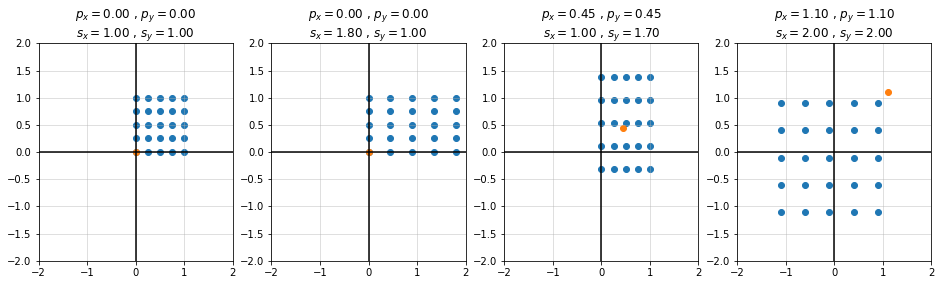

In [ ]:
def trans_scale(x, y, px, py, sx, sy):
    T = [[sx, 0 , px*(1 - sx)],
         [0 , sy, py*(1 - sy)],
         [0 , 0 , 1          ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

S_ = [[1, 1], [1.8, 1], [1, 1.7], [2, 2]]
P_ = [[0, 0], [0, 0], [0.45, 0.45], [1.1, 1.1]]

for i in range(4):
    sx, sy = S_[i]; px, py = P_[i]
    x_, y_, _ = trans_scale(x, y, px, py, sx, sy)
    ax[i].scatter(x_, y_)
    ax[i].scatter(px, py)
    ax[i].set_title(r'$p_x={0:.2f}$ , $p_y={1:.2f}$'.format(px, py) + '\n'
                    r'$s_x={0:.2f}$ , $s_y={1:.2f}$'.format(sx, sy))
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

## 3. Forgatás
---
Az $(p_x, p_y)$ ponthoz képest
$$
\large x'=(x - p_x)\cos\beta-(y - p_y)\sin \beta + p_x = x \cos \beta - y \sin \beta + p_x(1 - \cos \beta) + p_y \sin \beta \\
\large y'=(x - p_x)\sin\beta+(y - p_y)\cos \beta + p_y = x \sin \beta + y \cos \beta + p_y(1 - \cos \beta) - p_x \sin \beta
$$
&nbsp;
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} \cos\beta & -\sin\beta & p_x(1 - \cos \beta) + p_y \sin \beta \\ \sin\beta & \cos\beta & p_y(1 - \cos \beta) - p_x \sin \beta \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

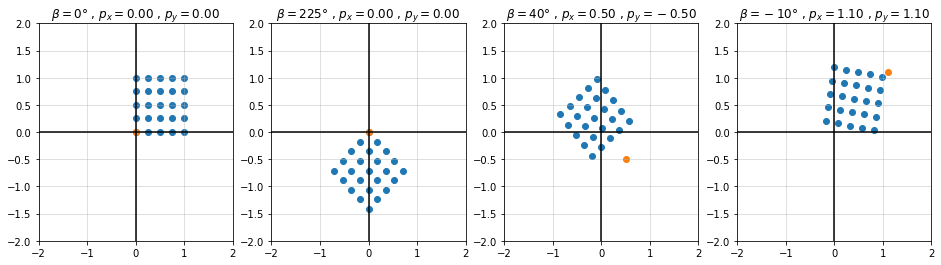

In [ ]:
def trans_rotate(x, y, px, py, beta):
    beta = np.deg2rad(beta)
    T = [[np.cos(beta), -np.sin(beta), px*(1 - np.cos(beta)) + py*np.sin(beta)],
         [np.sin(beta),  np.cos(beta), py*(1 - np.cos(beta)) - px*np.sin(beta)],
         [0           ,  0           , 1                                      ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

R_ = [0, 225, 40, -10]
P_ = [[0, 0], [0, 0], [0.5, -0.5], [1.1, 1.1]]

for i in range(4):
    beta = R_[i]; px, py = P_[i]
    x_, y_, _ = trans_rotate(x, y, px, py, beta)
    ax[i].scatter(x_, y_)
    ax[i].scatter(px, py)
    ax[i].set_title(r'$\beta={0}°$ , $p_x={1:.2f}$ , $p_y={2:.2f}$'.format(beta, px, py))
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

## 4. Transzformáció
---
Az $(p_x, p_y)$ ponthoz képest
$$
\large x' = x + \lambda_x(y - p_x) = x + \lambda_x y - \lambda_x p_x\\
\large y' = y + \lambda_y(x - p_y) = y + \lambda_y x - \lambda_y p_y
$$
&nbsp;
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & \lambda_x & -\lambda_x p_x \\ \lambda_y & 1 & -\lambda_y p_y  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

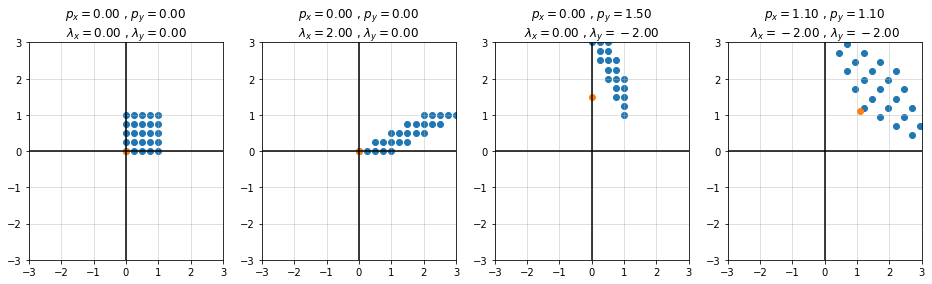

In [ ]:
def trans_shear(x, y, px, py, lambdax, lambday):
    T = [[1      , lambdax, -lambdax*px],
         [lambday, 1      , -lambday*py],
         [0      , 0      ,  1         ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

L_ = [[0, 0], [2, 0], [0, -2], [-2, -2]]
P_ = [[0, 0], [0, 0], [0, 1.5], [1.1, 1.1]]

for i in range(4):
    lambdax, lambday = L_[i]; px, py = P_[i]
    x_, y_, _ = trans_shear(x, y, px, py, lambdax, lambday)
    ax[i].scatter(x_, y_)
    ax[i].scatter(px, py)
    ax[i].set_title(r'$p_x={0:.2f}$ , $p_y={1:.2f}$'.format(px, py) + '\n'
                    r'$\lambda_x={0:.2f}$ , $\lambda_y={1:.2f}$'.format(lambdax, lambday))

    ax[i].set_xlim([-3, 3])
    ax[i].set_ylim([-3, 3])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

# 3D Mátrix transzformációk

A 3 dimenziós mátrixokkal kapcsolatos legfontosabb trasformációk és azok számítása.

In [ ]:
X, Y, Z = np.mgrid[0:1:5j, 0:1:5j, 0:1:5j]
x, y, z = X.ravel(), Y.ravel(), Z.ravel()

## 1. Eltolás
---
$$
\large x'=x + t_x \\
\large y'=y + t_y \\
\large z'=z + t_z
$$

&nbsp;

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & t_x \\ 0 & 1 & 0 & t_y \\ 0 & 0 & 1 & t_z \\ 0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

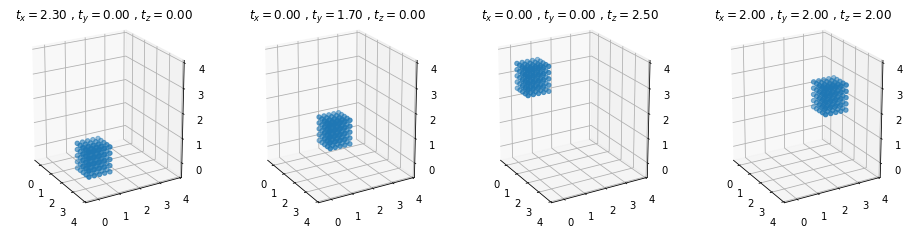

In [ ]:
def trans_translate(x, y, z, tx, ty, tz):
    T = [[1, 0, 0, tx],
         [0, 1, 0, ty],
         [0, 0, 1, tz],
         [0, 0, 0, 1 ]]
    T = np.array(T)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

T_ = [[2.3, 0, 0], [0, 1.7, 0], [0, 0, 2.5], [2, 2, 2]]

for i in range(4):
    tx, ty, tz = T_[i]
    x_, y_, z_, _ = trans_translate(x, y, z, tx, ty, tz)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].set_title(r'$t_x={0:.2f}$ , $t_y={1:.2f}$ , $t_z={2:.2f}$'.format(tx, ty, tz))
    
    ax[i].set_xlim([-0.5, 4])
    ax[i].set_ylim([-0.5, 4])
    ax[i].set_zlim([-0.5, 4])

plt.show()

## 2. Nyújtás
---
Az $(p_x, p_y, p_z)$ pontokhoz képest

$$
\large x'=s_x(x - p_x) + p_x = s_x x + p_x(1 - s_x) \\
\large y'=s_y(y - p_y) + p_y = s_y y + p_y(1 - s_y) \\
\large z'=s_z(z - p_z) + p_z = s_z z + p_z(1 - s_z)
$$

&nbsp;

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix} s_x & 0 & 0 & p_x(1 - s_x) \\ 0 & s_y & 0 & p_y(1 - s_y) \\ 0 & 0 & s_z & p_z(1 - s_z) \\ 0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

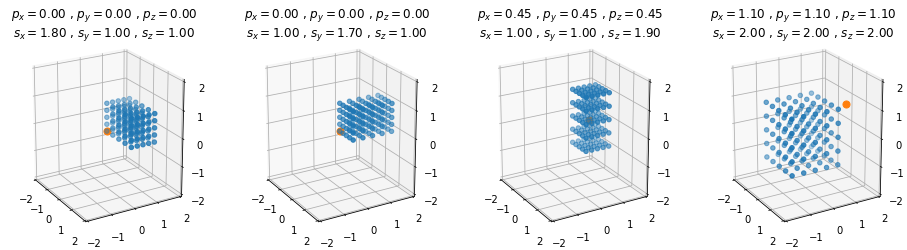

In [ ]:
def trans_scale(x, y, z,
                px, py, pz,
                sx, sy, sz):
    T = [[sx, 0 , 0 , px*(1 - sx)],
         [0 , sy, 0 , py*(1 - sy)],
         [0 , 0 , sz, pz*(1 - sz)],
         [0 , 0 , 0 , 1          ]]
    T = np.array(T)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

S_ = [[1.8, 1, 1], [1, 1.7, 1], [1, 1, 1.9], [2, 2, 2]]
P_ = [[0, 0, 0], [0, 0, 0], [0.45, 0.45, 0.45], [1.1, 1.1, 1.1]]

for i in range(4):
    sx, sy, sz = S_[i]; px, py, pz = P_[i]
    x_, y_, z_, _ = trans_scale(x, y, z, px, py, pz, sx, sy, sz)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].scatter(px, py, pz, s=50)
    ax[i].set_title(
        r'$p_x={0:.2f}$ , $p_y={1:.2f}$ , $p_z={2:.2f}$'.format(px, py, pz) + '\n'
        r'$s_x={0:.2f}$ , $s_y={1:.2f}$ , $s_z={2:.2f}$'.format(sx, sy, sz)
    )
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].set_zlim([-2, 2])

plt.show()

## 3. Forgatás
---
Az $(p_x, p_y, p_z)$ pontokhoz képest
$$ \large
R=R_x(\alpha)R_y(\beta)R_z(\gamma)
$$

<br>

### 3.1 Forgatás az x-tengely körül
---

$$
\large y'=(y - p_y)\cos\alpha-(z - p_z)\sin \alpha + p_y = y \cos \alpha - z \sin \alpha + p_y(1 - \cos \alpha) + p_z \sin \alpha \\
\large z'=(y - p_y)\sin\alpha+(z - p_z)\cos \alpha + p_z = y \sin \alpha + z \cos \alpha + p_z(1 - \cos \alpha) - p_y \sin \alpha
$$

&nbsp;

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos\alpha & -\sin\alpha & p_y(1 - \cos \alpha) + p_z \sin \alpha \\
0 & \sin\alpha & \cos\alpha & p_z(1 - \cos \alpha) - p_y \sin \alpha \\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

<br>

### 3.2 Forgatás az y-tengely körül
---

$$
\large x'=(x - p_x)\cos\beta+(z - p_z)\sin \beta + p_x = x \cos \beta + z \sin \beta + p_x(1 - \cos \beta) - p_z \sin \beta \\
\large z'=-(y - p_y)\sin\beta+(z - p_z)\cos \beta + p_z = -x \sin \beta + z \cos \beta + p_z(1 - \cos \beta) + p_x \sin \beta
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix}
\cos\beta & 0 & \sin\beta & p_x(1 - \cos \beta) - p_z \sin \beta \\
0 & 1 & 0 & 0 \\
-\sin\beta & 0 & \cos\beta & p_z(1 - \cos \beta) + p_x \sin \beta \\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

<br>

### 3.3. Forgatás a z-tengely körül
---

$$
\large x'=(x - p_x)\cos\gamma-(y - p_y)\sin \gamma + p_x = x \cos \gamma - y \sin \gamma + p_x(1 - \cos \gamma) + p_y \sin \gamma \\
\large y'=(x - p_x)\sin\gamma+(y - p_y)\cos \gamma + p_y = x \sin \gamma + y \cos \gamma + p_y(1 - \cos \gamma) - p_x \sin \gamma
$$

&nbsp;

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix}
\cos\gamma & -\sin\gamma & 0 & p_x(1 - \cos \gamma) + p_y \sin \gamma \\
\sin\gamma & \cos\gamma & 0 & p_y(1 - \cos \gamma) - p_x \sin \gamma \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

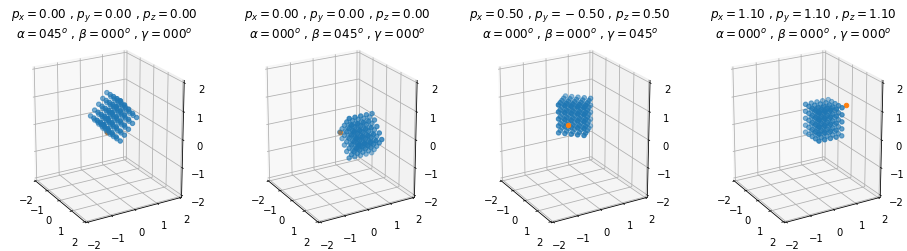

In [ ]:
def trans_rotate(x, y, z, px, py, pz, alpha, beta, gamma):
    alpha, beta, gamma = np.deg2rad(alpha), np.deg2rad(beta), np.deg2rad(gamma)
    Rx = [[1, 0            ,  0            , 0                                        ],
          [0, np.cos(alpha), -np.sin(alpha), py*(1 - np.cos(alpha)) + pz*np.sin(alpha)],
          [0, np.sin(alpha),  np.cos(alpha), pz*(1 - np.cos(alpha)) - py*np.sin(alpha)],
          [0, 0            ,  0            , 1                                        ]]
    Ry = [[ np.cos(beta), 0, np.sin(beta), px*(1 - np.cos(beta)) - pz*np.sin(beta)],
          [ 0           , 1, 0           , 0                                      ],
          [-np.sin(beta), 0, np.cos(beta), pz*(1 - np.cos(beta)) + px*np.sin(beta)],
          [ 0           , 0, 0           , 1                                      ]]
    Rz = [[np.cos(gamma), -np.sin(gamma), 0, px*(1 - np.cos(gamma)) + py*np.sin(gamma)],
          [np.sin(gamma),  np.cos(gamma), 0, py*(1 - np.cos(gamma)) - px*np.sin(gamma)],
          [0            ,  0            , 1, 0                                        ],
          [0            ,  0            , 0, 1                                        ]]
    
    Rx = np.array(Rx); Ry = np.array(Ry); Rz = np.array(Rz)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(np.dot(np.dot(Rx, Ry), Rz), P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

R_ = [[45, 0, 0],
      [0, 45, 0],
      [0, 0, 45],
      [0, 0, 0]]
P_ = [[0, 0, 0],
      [0, 0, 0],
      [0.5, -0.5, 0.5],
      [1.1, 1.1, 1.1]]

for i in range(4):
    alpha, beta, gamma = R_[i]; px, py, pz = P_[i]
    x_, y_, z_, _ = trans_rotate(x, y, z, px, py, pz, alpha, beta, gamma)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].scatter(px, py, pz)
    ax[i].set_title(
        r'$p_x={0:.2f}$ , $p_y={1:.2f}$ , $p_z={2:.2f}$'.format(px, py, pz) + '\n'
        r'$\alpha={0:03d}^o$ , $\beta={1:03d}^o$ , $\gamma={2:03d}^o$'.format(alpha, beta, gamma)
    )
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].set_zlim([-2, 2])

plt.show()

## 4. Shearing
---
Az $(p_x, p_y, p_z)$ pontokhoz képest

$$
\large x' = x + \lambda_x^y(y - p_x) + \lambda_x^z(z - p_x) = x + \lambda_x^y y + \lambda_x^z z - (\lambda_x^y + \lambda_x^z) p_x\\
\large y' = y + \lambda_y^x(x - p_y) + \lambda_y^z(z - p_y) = y + \lambda_y^x x + \lambda_y^z z - (\lambda_y^x + \lambda_y^z) p_y\\
\large z' = z + \lambda_z^x(x - p_z) + \lambda_z^y(y - p_z) = z + \lambda_z^x x + \lambda_z^y y - (\lambda_z^x + \lambda_z^y) p_z
$$

&nbsp;

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} =\begin{bmatrix} 
1 & \lambda_x^y & \lambda_x^z & -(\lambda_x^y + \lambda_x^z) p_x \\
\lambda_y^x & 1 & \lambda_y^z & -(\lambda_y^x + \lambda_y^z) p_y \\
\lambda_z^x & \lambda_z^y & 1 & -(\lambda_z^x + \lambda_z^y) p_z \\
0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

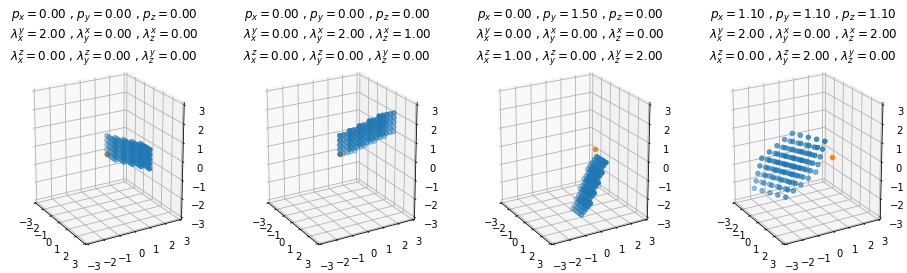

In [ ]:
def trans_shear(x, y, z, px, py, pz,
                lambdaxy, lambdaxz,
                lambdayx, lambdayz,
                lambdazx, lambdazy):
    T = [[1       , lambdaxy, lambdaxz, -(lambdaxy+lambdaxz)*px],
         [lambdayx, 1       , lambdayz, -(lambdayx+lambdayz)*py],
         [lambdazx, lambdazy, 1       , -(lambdazx+lambdazy)*py],
         [0       , 0       , 0       , 1                      ]]
    T = np.array(T)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

L_ = [[[2, 0], [0, 0], [0, 0]],
      [[0, 0], [2, 0], [1, 0]],
      [[0, 1], [0, 0], [0, 2]],
      [[2, 0], [0, 2], [2, 0]]]
P_ = [[0, 0, 0], [0, 0, 0], [0, 1.5, 0], [1.1, 1.1, 1.1]]

for i in range(4):
    lambdax, lambday, lambdaz = L_[i]; px, py, pz = P_[i]
    x_, y_, z_, _ = trans_shear(x, y, z, px, py, pz,
                                *lambdax, *lambday, *lambdaz)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].scatter(px, py)
    ax[i].set_title(
        r'$p_x={0:.2f}$ , $p_y={1:.2f}$ , $p_z={2:.2f}$'.format(px, py, pz) + '\n'
        r'$\lambda_x^y={0:.2f}$ , $\lambda_y^x={1:.2f}$ , $\lambda_z^x={2:.2f}$'.format(lambdax[0], lambday[0], lambdaz[0]) + '\n'
        r'$\lambda_x^z={0:.2f}$ , $\lambda_y^z={1:.2f}$ , $\lambda_z^y={2:.2f}$'.format(lambdax[1], lambday[1], lambdaz[1])
    )

    ax[i].set_xlim([-3, 3])
    ax[i].set_ylim([-3, 3])
    ax[i].set_zlim([-3, 3])

plt.show()

# Pictures

In [ ]:
import imageio
import skimage
import skimage.io
import matplotlib.pyplot as plt

In [ ]:
image = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

In [ ]:
red = image[:,:,1]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

print(A)

[[ 0  1  0]
 [ 1  0  1]
 [ 0 -1  2]
 [-1  0  3]]


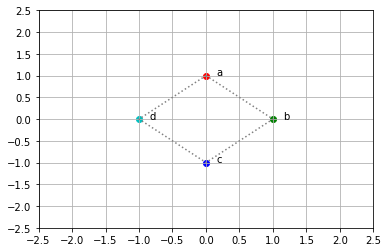

In [ ]:
color_lut = 'rgbc'
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

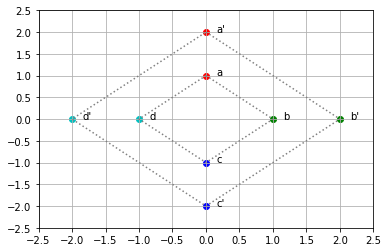

In [ ]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

(52, 52)
(52, 52, 3)


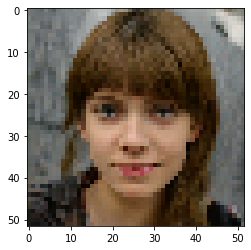

In [46]:
small = red[::20, ::20]

print(small.shape)
plt.imshow(small, cmap='gray')

tiny = image[::20, ::20, :]

print(tiny.shape)
plt.imshow(tiny, cmap='gray')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x = []
y = []
z = []
for i in range(small.shape[0]):
  for j in range(small.shape[1]):
    x.append(i)
    y.append(j)
    z.append(small[x,y])

X = np.array(x)
Y = np.array(y)
Z = np.array(z)



In [ ]:
f = np.stack((X, Y, Z))

f.shape

(3, 2704)

In [ ]:
n = f.T

n.shape

(2704, 3)

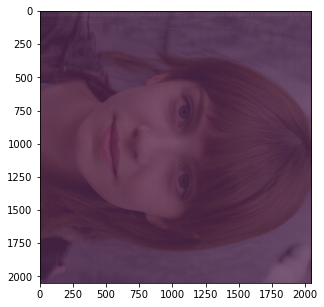

In [51]:
img = image.copy()



# 3x3 Identity transformation matrix
I = np.eye(3)

# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

# create the rotation transformation matrix
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])


T = T_s @ T_r

# 2x scaling requires a tranformation image array 2x the original image
img_transformed = np.empty((2048, 2048, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

In [ ]:
https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv